# DECI results visualisation

This script reproduces the box plots that are presented in our paper [Deep End-to-end Causal Inference](https://arxiv.org/abs/2202.02195).

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd

The results from the runs used for the paper are provided in CSV format. To make box plots with your own results, you will need to construct a CSV with the same format as `complete_deci_results.csv` and load that in place of our CSV file.

In [8]:
df = pd.read_csv("complete_deci_results.csv")

## Box plots

### Box plot for ATE on selected datasets

Use this code to reproduce Figure 4 in the paper.

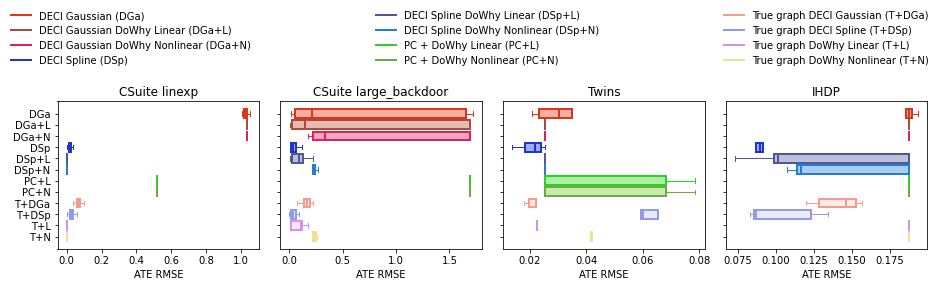

In [9]:
datasets = ["csuite_linexp", "csuite_large_backdoor", "twins", "ihdp"]
methods = ["deci_gaussian", "deci_gaussian_dowhy_linear", "deci_gaussian_dowhy_nonlinear", "deci_spline",
          "deci_spline_dowhy_linear", "deci_spline_dowhy_nonlinear", "pc_dowhy_linear", "pc_dowhy_nonlinear",
          "true_graph_deci_gaussian", "true_graph_deci_spline", "true_graph_dowhy_linear",
          "true_graph_dowhy_nonlinear"]
acronyms = ["DGa", "DGa+L", "DGa+N", "DSp", "DSp+L", "DSp+N", "PC+L", "PC+N", "T+DGa", "T+DSp", "T+L", "T+N"]
titles = ["CSuite linexp", "CSuite large_backdoor", "Twins", "IHDP"]
legends = ["DECI Gaussian (DGa)",
           "DECI Gaussian DoWhy Linear (DGa+L)",
           "DECI Gaussian DoWhy Nonlinear (DGa+N)",
           "DECI Spline (DSp)",
           "DECI Spline DoWhy Linear (DSp+L)",
           "DECI Spline DoWhy Nonlinear (DSp+N)",
           "PC + DoWhy Linear (PC+L)",
           "PC + DoWhy Nonlinear (PC+N)",
           "True graph DECI Gaussian (T+DGa)",
           "True graph DECI Spline (T+DSp)",
           "True graph DoWhy Linear (T+L)",
           "True graph DoWhy Nonlinear (T+N)",
          ]
target_col = "ATE RMSE"

new_colors = [("#dc3618", "#f5afa3"),  # red high sat
              ("#ac4b39", "#e6bab3"),  # red brown 
              ("#df2060", "#f2a6bf"),  # pink-red mid sat
              ("#1f34d1", "#a1abf7"),  # blue high sat
              ("#505895", "#bdc0db"),  # blue lower sat
              ("#257dd0", "#a8cdf0"),  # blue/turquoise mid sat
              ("#2dd025", "#acf0a8"),  # green high sat
              ("#6fab44", "#c7ebad"),  # green-yellow mid sat
              ("#f29c8c", "#fcebe8"),  # red light
              ("#909bee", "#e9ebfc"),  # blue light
              ("#d590ee", "#f7e9fc"),  # light purple
              ("#eee290", "#fcf9e9"),  # light yellow
             ]

def set_box_color(bp, color, dashed_line=False):
    plt.setp(bp['whiskers'], color=color[0])
    plt.setp(bp['caps'], color=color[0])
    for box in bp['boxes']:
        box.set_facecolor(color[1])

median_lines = []

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(13, 3))

m = 1 / (len(methods)-1)

for j, dataset in enumerate(datasets):
    for i, (method, color) in enumerate(zip(methods, new_colors)):
        ax = axs[j]
        data_a = df[(df["model_config_name"] == method) & (df["dataset"] == dataset)][target_col].values
        flierprops = dict(marker='o', markeredgecolor=color[0])
        medianprops = dict(linewidth=2., color=color[0])
        boxprops = dict(linewidth=2., color=color[0])
        bpl = ax.boxplot(data_a, patch_artist=True, positions=[1 - m*i], widths=[m*0.8], vert=False,
                         showfliers=False, medianprops=medianprops, boxprops=boxprops)
        set_box_color(bpl, color, "true_graph" in method)
        if j ==len(datasets)-1:
            median_lines.append(bpl['medians'][0])
        ax.set_xlabel("ATE RMSE")

    ax.set_ylim(-0.1, 1.1)
    if j == 0:
        ax.set_yticklabels(acronyms)
        ax.tick_params(axis="y")
    else:
        ax.set_yticklabels([])
    ax.set_title(titles[j])

fig.legend(median_lines, legends, loc='lower center', bbox_to_anchor=(0, 1, 1, 0), mode="expand", ncol=3,
          frameon=False)
fig.tight_layout()
# plt.savefig("ate_rmse_main_paper.pdf", bbox_inches="tight")

### Box plot for CATE on compatible datasets

Use this code to reproduce Figure 5 from the paper.

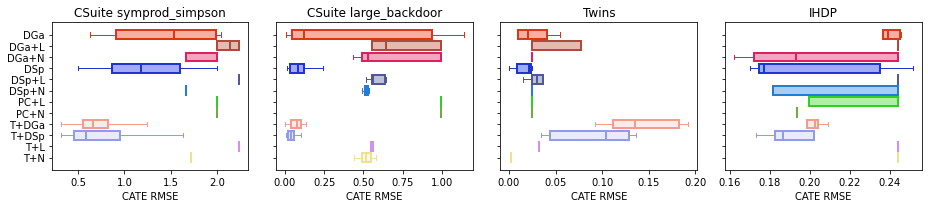

In [10]:
datasets = ["csuite_symprod_simpson", "csuite_large_backdoor", 
            "twins", "ihdp"]
methods = ["deci_gaussian", "deci_gaussian_dowhy_linear", "deci_gaussian_dowhy_nonlinear", "deci_spline",
          "deci_spline_dowhy_linear", "deci_spline_dowhy_nonlinear", "pc_dowhy_linear", "pc_dowhy_nonlinear",
          "true_graph_deci_gaussian", "true_graph_deci_spline", "true_graph_dowhy_linear",
          "true_graph_dowhy_nonlinear"]
acronyms = ["DGa", "DGa+L", "DGa+N", "DSp", "DSp+L", "DSp+N", "PC+L", "PC+N", "T+DGa", "T+DSp", "T+L", "T+N"]
titles = ["CSuite symprod_simpson", "CSuite large_backdoor", "Twins", "IHDP"]
legends = ["DECI Gaussian (DGa)",
           "DECI Gaussian DoWhy Linear (DGa+L)",
           "DECI Gaussian DoWhy Nonlinear (DGa+N)",
           "DECI Spline (DSp)",
           "DECI Spline DoWhy Linear (DSp+L)",
           "DECI Spline DoWhy Nonlinear (DSp+N)",
           "PC + DoWhy Linear (PC+L)",
           "PC + DoWhy Nonlinear (PC+N)",
           "True graph DECI Gaussian (T+DGa)",
           "True graph DECI Spline (T+DSp)",
           "True graph DoWhy Linear (T+L)",
           "True graph DoWhy Nonlinear (T+N)",
          ]
target_col = "CATE RMSE"

new_colors = [("#dc3618", "#f5afa3"),  # red high sat
              ("#ac4b39", "#e6bab3"),  # red brown 
              ("#df2060", "#f2a6bf"),  # pink-red mid sat
              ("#1f34d1", "#a1abf7"),  # blue high sat
              ("#505895", "#bdc0db"),  # blue lower sat
              ("#257dd0", "#a8cdf0"),  # blue/turquoise mid sat
              ("#2dd025", "#acf0a8"),  # green high sat
              ("#6fab44", "#c7ebad"),  # green-yellow mid sat
              ("#f29c8c", "#fcebe8"),  # red light
              ("#909bee", "#e9ebfc"),  # blue light
              ("#d590ee", "#f7e9fc"),  # light purple
              ("#eee290", "#fcf9e9"),  # light yellow
             ]

def set_box_color(bp, color, dashed_line=False):
    plt.setp(bp['whiskers'], color=color[0])
    plt.setp(bp['caps'], color=color[0])
    for box in bp['boxes']:
        box.set_facecolor(color[1])

median_lines = []

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(13, 3))

m = 1 / (len(methods)-1)

for j, dataset in enumerate(datasets):
    for i, (method, color) in enumerate(zip(methods, new_colors)):
        ax = axs[j]
        data_a = df[(df["model_config_name"] == method) & (df["dataset"] == dataset)][target_col].values
        flierprops = dict(marker='o', markeredgecolor=color[0])
        medianprops = dict(linewidth=2., color=color[0])
        boxprops = dict(linewidth=2., color=color[0])
        bpl = ax.boxplot(data_a, patch_artist=True, positions=[1 - m*i], widths=[m*0.8], vert=False,
                         showfliers=False, medianprops=medianprops, boxprops=boxprops)
        set_box_color(bpl, color, "true_graph" in method)
        if j ==len(datasets)-1:
            median_lines.append(bpl['medians'][0])
        ax.set_xlabel("CATE RMSE")

    ax.set_ylim(-0.1, 1.1)
    if j == 0:
        ax.set_yticklabels(acronyms)
        ax.tick_params(axis="y")
    else:
        ax.set_yticklabels([])
    ax.set_title(titles[j])

fig.tight_layout()
# plt.savefig("cate_rmse_main_paper.pdf", bbox_inches="tight")

### Box plot for ATE on all CSuite datasets
Use this code to reproduce Figure 7 from the paper.

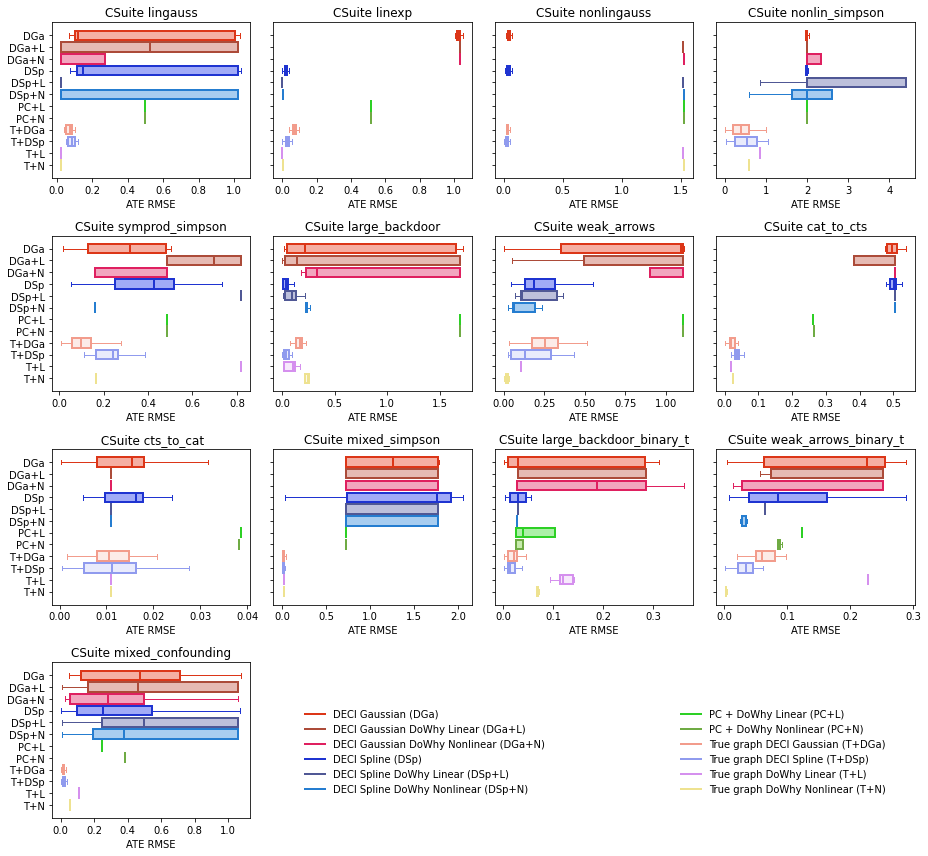

In [11]:
datasets = ["csuite_lingauss", "csuite_linexp", "csuite_nonlingauss", "csuite_nonlin_simpson", 
            "csuite_symprod_simpson", "csuite_large_backdoor", "csuite_weak_arrows",
            "csuite_cat_to_cts", "csuite_cts_to_cat", "csuite_mixed_simpson",
            "csuite_large_backdoor_binary_t", "csuite_weak_arrows_binary_t",
            "csuite_mixed_confounding"]
methods = ["deci_gaussian", "deci_gaussian_dowhy_linear", "deci_gaussian_dowhy_nonlinear", "deci_spline",
          "deci_spline_dowhy_linear", "deci_spline_dowhy_nonlinear", "pc_dowhy_linear", "pc_dowhy_nonlinear",
          "true_graph_deci_gaussian", "true_graph_deci_spline", "true_graph_dowhy_linear",
          "true_graph_dowhy_nonlinear"]
acronyms = ["DGa", "DGa+L", "DGa+N", "DSp", "DSp+L", "DSp+N", "PC+L", "PC+N", "T+DGa", "T+DSp", "T+L", "T+N"]
titles = ["CSuite lingauss", "CSuite linexp", "CSuite nonlingauss", "CSuite nonlin_simpson",
          "CSuite symprod_simpson", "CSuite large_backdoor", "CSuite weak_arrows", 
          "CSuite cat_to_cts", " CSuite cts_to_cat", "CSuite mixed_simpson",
          "CSuite large_backdoor_binary_t", "CSuite weak_arrows_binary_t",
          "CSuite mixed_confounding"]
legends = ["DECI Gaussian (DGa)",
           "DECI Gaussian DoWhy Linear (DGa+L)",
           "DECI Gaussian DoWhy Nonlinear (DGa+N)",
           "DECI Spline (DSp)",
           "DECI Spline DoWhy Linear (DSp+L)",
           "DECI Spline DoWhy Nonlinear (DSp+N)",
           "PC + DoWhy Linear (PC+L)",
           "PC + DoWhy Nonlinear (PC+N)",
           "True graph DECI Gaussian (T+DGa)",
           "True graph DECI Spline (T+DSp)",
           "True graph DoWhy Linear (T+L)",
           "True graph DoWhy Nonlinear (T+N)",
          ]
target_col = "ATE RMSE"

new_colors = [("#dc3618", "#f5afa3"),  # red high sat
              ("#ac4b39", "#e6bab3"),  # red brown 
              ("#df2060", "#f2a6bf"),  # pink-red mid sat
              ("#1f34d1", "#a1abf7"),  # blue high sat
              ("#505895", "#bdc0db"),  # blue lower sat
              ("#257dd0", "#a8cdf0"),  # blue/turquoise mid sat
              ("#2dd025", "#acf0a8"),  # green high sat
              ("#6fab44", "#c7ebad"),  # green-yellow mid sat
              ("#f29c8c", "#fcebe8"),  # red light
              ("#909bee", "#e9ebfc"),  # blue light
              ("#d590ee", "#f7e9fc"),  # light purple
              ("#eee290", "#fcf9e9"),  # light yellow
             ]

def set_box_color(bp, color, dashed_line=False):
    plt.setp(bp['whiskers'], color=color[0])
    plt.setp(bp['caps'], color=color[0])
    for box in bp['boxes']:
        box.set_facecolor(color[1])

median_lines = []

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(13, 3*4))
axs = axs.flatten()

m = 1 / (len(methods)-1)

for j, dataset in enumerate(datasets):
    for i, (method, color) in enumerate(zip(methods, new_colors)):
        ax = axs[j]
        data_a = df[(df["model_config_name"] == method) & (df["dataset"] == dataset)][target_col].values
        flierprops = dict(marker='o', markeredgecolor=color[0])
        medianprops = dict(linewidth=2., color=color[0])
        boxprops = dict(linewidth=2., color=color[0])
        bpl = ax.boxplot(data_a, patch_artist=True, positions=[1 - m*i], widths=[m*0.8], vert=False,
                         showfliers=False, medianprops=medianprops, boxprops=boxprops)
        set_box_color(bpl, color, "true_graph" in method)
        if j ==len(datasets)-1:
            median_lines.append(bpl['medians'][0])
        ax.set_xlabel("ATE RMSE")

    ax.set_ylim(-0.1, 1.1)
    if j % 4 == 0:
        ax.set_yticklabels(acronyms)
        ax.tick_params(axis="y")
    else:
        ax.set_yticklabels([])
    ax.set_title(titles[j])

for k in [-1, -2, -3]:
    axs[k].axis('off')

fig.legend(median_lines, legends, loc='center', bbox_to_anchor=(0.32, 0., .64, .25), mode="expand", ncol=2,
           frameon=False)

fig.tight_layout()
# plt.savefig("ate_rmse_appendix.pdf", bbox_inches="tight")

## Box plot for CATE on all CSuite datasets

Use this code to reproduce Figure 8 from the paper.

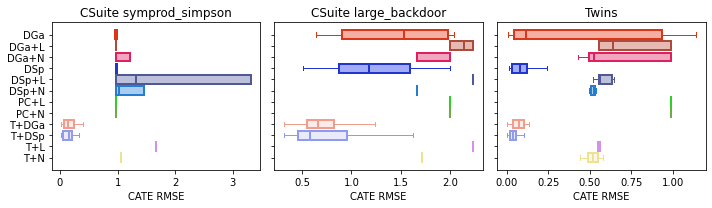

In [12]:
datasets = ["csuite_nonlin_simpson", "csuite_symprod_simpson", "csuite_large_backdoor"]
methods = ["deci_gaussian", "deci_gaussian_dowhy_linear", "deci_gaussian_dowhy_nonlinear", "deci_spline",
          "deci_spline_dowhy_linear", "deci_spline_dowhy_nonlinear", "pc_dowhy_linear", "pc_dowhy_nonlinear",
          "true_graph_deci_gaussian", "true_graph_deci_spline", "true_graph_dowhy_linear",
          "true_graph_dowhy_nonlinear"]
acronyms = ["DGa", "DGa+L", "DGa+N", "DSp", "DSp+L", "DSp+N", "PC+L", "PC+N", "T+DGa", "T+DSp", "T+L", "T+N"]
titles = ["CSuite symprod_simpson", "CSuite large_backdoor", "Twins", "IHDP"]
legends = ["DECI Gaussian (DGa)",
           "DECI Gaussian DoWhy Linear (DGa+L)",
           "DECI Gaussian DoWhy Nonlinear (DGa+N)",
           "DECI Spline (DSp)",
           "DECI Spline DoWhy Linear (DSp+L)",
           "DECI Spline DoWhy Nonlinear (DSp+N)",
           "PC + DoWhy Linear (PC+L)",
           "PC + DoWhy Nonlinear (PC+N)",
           "True graph DECI Gaussian (T+DGa)",
           "True graph DECI Spline (T+DSp)",
           "True graph DoWhy Linear (T+L)",
           "True graph DoWhy Nonlinear (T+N)",
          ]
target_col = "CATE RMSE"

new_colors = [("#dc3618", "#f5afa3"),  # red high sat
              ("#ac4b39", "#e6bab3"),  # red brown 
              ("#df2060", "#f2a6bf"),  # pink-red mid sat
              ("#1f34d1", "#a1abf7"),  # blue high sat
              ("#505895", "#bdc0db"),  # blue lower sat
              ("#257dd0", "#a8cdf0"),  # blue/turquoise mid sat
              ("#2dd025", "#acf0a8"),  # green high sat
              ("#6fab44", "#c7ebad"),  # green-yellow mid sat
              ("#f29c8c", "#fcebe8"),  # red light
              ("#909bee", "#e9ebfc"),  # blue light
              ("#d590ee", "#f7e9fc"),  # light purple
              ("#eee290", "#fcf9e9"),  # light yellow
             ]

def set_box_color(bp, color, dashed_line=False):
    plt.setp(bp['whiskers'], color=color[0])
    plt.setp(bp['caps'], color=color[0])
    for box in bp['boxes']:
        box.set_facecolor(color[1])

median_lines = []

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))

m = 1 / (len(methods)-1)

for j, dataset in enumerate(datasets):
    for i, (method, color) in enumerate(zip(methods, new_colors)):
        ax = axs[j]
        data_a = df[(df["model_config_name"] == method) & (df["dataset"] == dataset)][target_col].values
        flierprops = dict(marker='o', markeredgecolor=color[0])
        medianprops = dict(linewidth=2., color=color[0])
        boxprops = dict(linewidth=2., color=color[0])
        bpl = ax.boxplot(data_a, patch_artist=True, positions=[1 - m*i], widths=[m*0.8], vert=False,
                         showfliers=False, medianprops=medianprops, boxprops=boxprops)
        set_box_color(bpl, color, "true_graph" in method)
        if j ==len(datasets)-1:
            median_lines.append(bpl['medians'][0])
        ax.set_xlabel("CATE RMSE")

    ax.set_ylim(-0.1, 1.1)
    if j == 0:
        ax.set_yticklabels(acronyms)
        ax.tick_params(axis="y")
    else:
        ax.set_yticklabels([])
    ax.set_title(titles[j])

fig.tight_layout()
# plt.savefig("cate_rmse_appendix.pdf", bbox_inches="tight")